# IMPORT LIBRARIES

In [16]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# LOAD DATASET FOR SCENARIO 2

In [17]:
test_unknown_data_path = './data/1_rf_test_unknown_data.csv'
test_unknown_data = pd.read_csv(test_unknown_data_path)

test_unknown_label_path = './data/1_rf_test_unknown_label.csv'
test_unknown_label = pd.read_csv(test_unknown_label_path)

In [18]:
# Display column names
print("Column names:")
print(test_unknown_data.columns)

# Display dataset shape
print("\nDataset shape:")
print(test_unknown_data.shape)

#print labels
labels_counts = test_unknown_label['label'].value_counts()

# Print the counts
for label, count in labels_counts.items():
    print(f'Label: {label}, Count: {count}')

Column names:
Index(['flow_duration', 'Header_Length', 'Protocol Type', 'Duration', 'Rate',
       'Srate', 'Drate', 'fin_flag_number', 'syn_flag_number',
       'rst_flag_number', 'psh_flag_number', 'ack_flag_number',
       'ece_flag_number', 'cwr_flag_number', 'ack_count', 'syn_count',
       'fin_count', 'urg_count', 'rst_count', 'HTTP', 'HTTPS', 'DNS', 'Telnet',
       'SMTP', 'SSH', 'IRC', 'TCP', 'UDP', 'DHCP', 'ARP', 'ICMP', 'IPv', 'LLC',
       'Tot sum', 'Min', 'Max', 'AVG', 'Std', 'Tot size', 'IAT', 'Number',
       'Magnitue', 'Radius', 'Covariance', 'Variance', 'Weight'],
      dtype='object')

Dataset shape:
(5990, 46)
Label: BenignTraffic, Count: 5110
Label: MITM-ArpSpoofing, Count: 210
Label: Recon-OSScan, Count: 182
Label: DNS_Spoofing, Count: 162
Label: Recon-PortScan, Count: 137
Label: Recon-HostDiscovery, Count: 93
Label: DictionaryBruteForce, Count: 26
Label: SqlInjection, Count: 18
Label: BrowserHijacking, Count: 7
Label: CommandInjection, Count: 7
Label: DDoS-UDP_

# USING ELBOW METHOD TO FIND OPTIMUM K VALUE

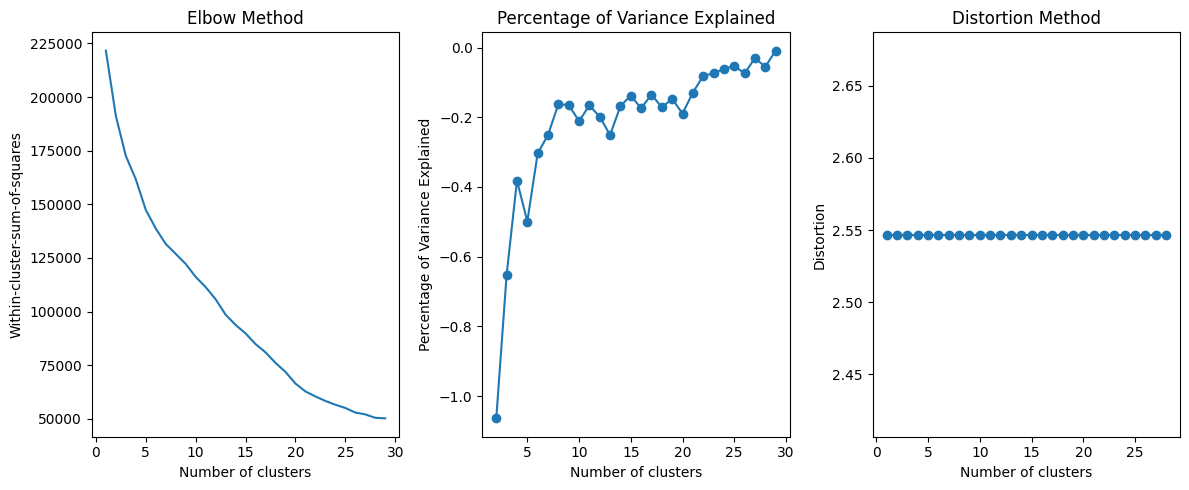

In [19]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

# Assuming 'test_unknown_data' is your dataset
data = test_unknown_data

# Step 4: Data Preprocessing
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Step 5: Choose the Number of Clusters (K)
wcss = []
for i in range(1, 30):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

# Calculate the percentage of variance explained
percentage_var_explained = np.diff(wcss) / np.sum(wcss[:-1]) * 100

# Finding the optimal number of clusters using the "elbow method"
distortions = []
for i in range(1, len(wcss)):
    distortions.append(sum(np.min(cdist(scaled_data, kmeans.cluster_centers_, 'euclidean'), axis=1)) / scaled_data.shape[0])

# Plotting the elbow graph with the percentage of variance explained
plt.figure(figsize=(12, 5))

# Elbow Method Plot
plt.subplot(1, 3, 1)
plt.plot(range(1, 30), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster-sum-of-squares')

# Percentage of Variance Explained Plot
plt.subplot(1, 3, 2)
plt.plot(range(2, 30), percentage_var_explained, marker='o')
plt.title('Percentage of Variance Explained')
plt.xlabel('Number of clusters')
plt.ylabel('Percentage of Variance Explained')

# Distortion Plot for Optimal K
plt.subplot(1, 3, 3)
plt.plot(range(1, len(wcss)), distortions, marker='o')
plt.title('Distortion Method')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')

plt.tight_layout()
plt.show()

# FINDING Silhouette Score AND PLOTTING

Silhouette Score: 0.2416180404427187


C:\Users\JUI BANGALI\AppData\Local\Temp\ipykernel_18456\622286992.py:33: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(range(len(test_cluster_labels)), test_cluster_labels, cmap='viridis', marker='o')


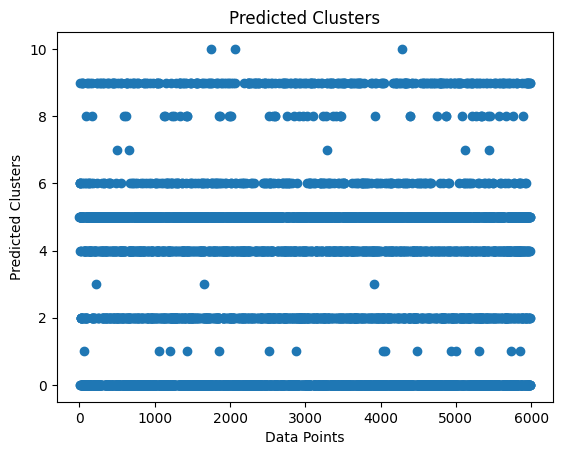

In [20]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Drop the 'Cluster' column if it exists
data_for_scaling = data.drop('Cluster', axis=1, errors='ignore')

# Step 4: Data Preprocessing
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_for_scaling)

# Manually set the optimal number of clusters based on the elbow method
your_optimal_k = 11

# Fit K-Means model to the training data
kmeans = KMeans(n_clusters=your_optimal_k, init='k-means++', max_iter=300, n_init=10, random_state=2)
kmeans.fit(scaled_data)

# Assuming your test data has the same features as the training data
scaled_test_data = scaler.transform(data_for_scaling)

# Predict the clusters for the test data
test_cluster_labels = kmeans.predict(scaled_test_data)

# Silhouette Score for clustering evaluation
silhouette_avg = silhouette_score(scaled_test_data, test_cluster_labels)
print(f"Silhouette Score: {silhouette_avg}")

# Plotting predicted clusters
plt.scatter(range(len(test_cluster_labels)), test_cluster_labels, cmap='viridis', marker='o')
plt.xlabel('Data Points')
plt.ylabel('Predicted Clusters')
plt.title('Predicted Clusters')
plt.show()


# PERFORM KMEANS AND PLOT PCA

C:\Users\JUI BANGALI\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


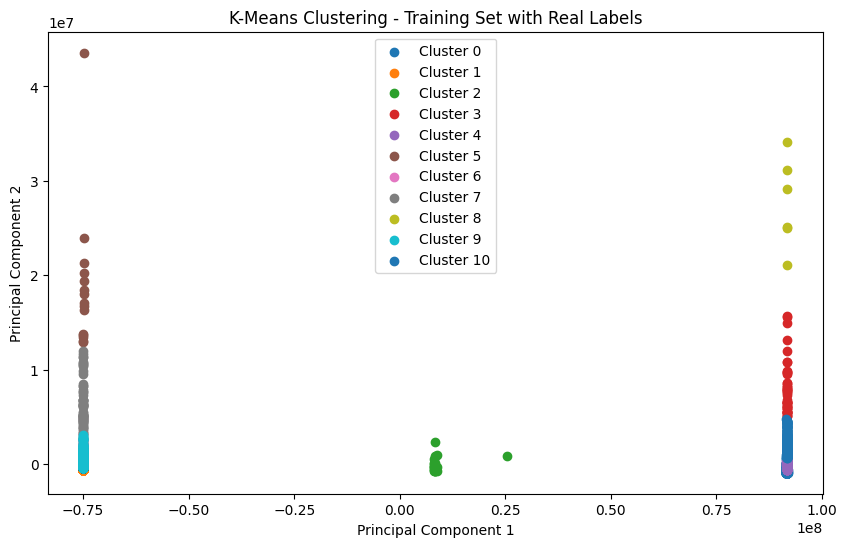

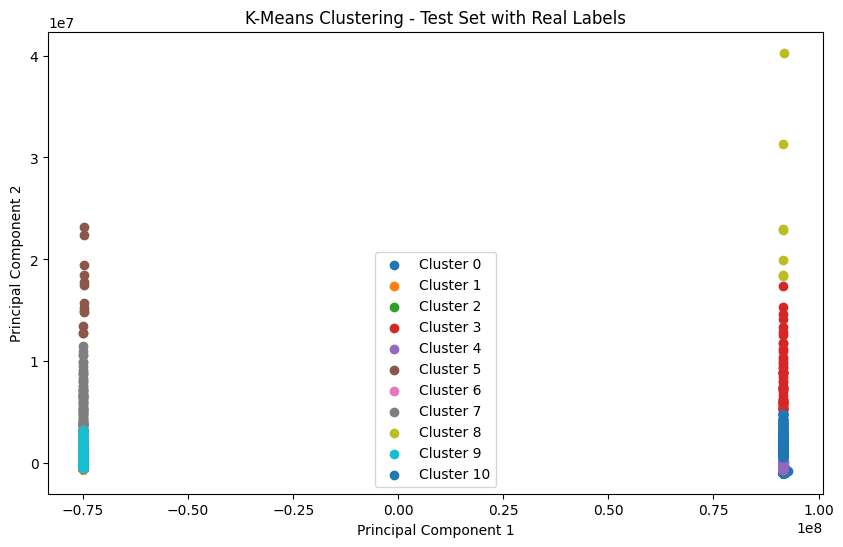

In [21]:
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

test = './data/testing_data.csv'
test_data = pd.read_csv(test)

test_L = './data/testing_lable.csv'
test_L_data = pd.read_csv(test_L)

# Assuming 'test_unknown_data' is your dataset
# and 'test_unknown_label' is your label
X = test_unknown_data
y = test_unknown_label['label'] 

# Apply label encoding to the labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

X_train = X
y_train = y

X_test = test_data
y_test = test_L_data

# Specify the number of clusters
number_of_clusters = 11

# Apply k-means clustering on the training set
kmeans = KMeans(n_clusters=number_of_clusters, random_state=42)
train_predicted_labels = kmeans.fit_predict(X_train)

# Apply the clustering model to the test set
test_predicted_labels = kmeans.predict(X_test)

# Visualize clusters using PCA for dimensionality reduction
pca = PCA(n_components=2)
X_train_reduced = pca.fit_transform(X_train)
X_test_reduced = pca.transform(X_test)

# Scatter plot for training set with real labels
plt.figure(figsize=(10, 6))
for cluster in range(number_of_clusters):
    cluster_mask = (train_predicted_labels == cluster)
    plt.scatter(X_train_reduced[cluster_mask, 0], X_train_reduced[cluster_mask, 1], label=f'Cluster {cluster}')

plt.title('K-Means Clustering - Training Set with Real Labels')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

# Scatter plot for test set with real labels
plt.figure(figsize=(10, 6))
for cluster in range(number_of_clusters):
    cluster_mask = (test_predicted_labels == cluster)
    plt.scatter(X_test_reduced[cluster_mask, 0], X_test_reduced[cluster_mask, 1], label=f'Cluster {cluster}')

plt.title('K-Means Clustering - Test Set with Real Labels')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

# PERFORM K MEANS AND PLOT KMEANS RESULTS

C:\Users\JUI BANGALI\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Inertia (Model 1): 109155.96416406793
Silhouette Score (Model 1): -0.8438378672078011
Calinski-Harabasz Index (Model 1): 69.62438657959811
Davies-Bouldin Index (Model 1): 21.084920939676


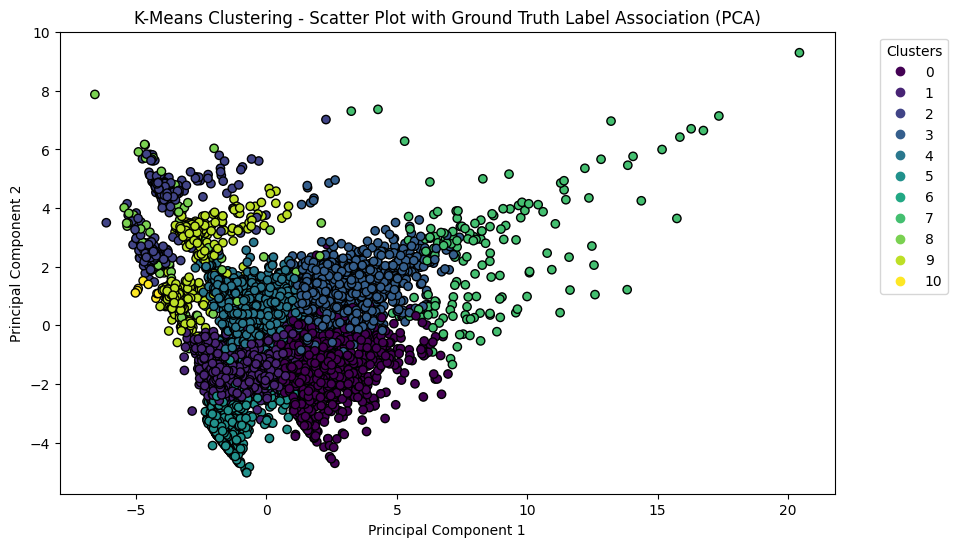

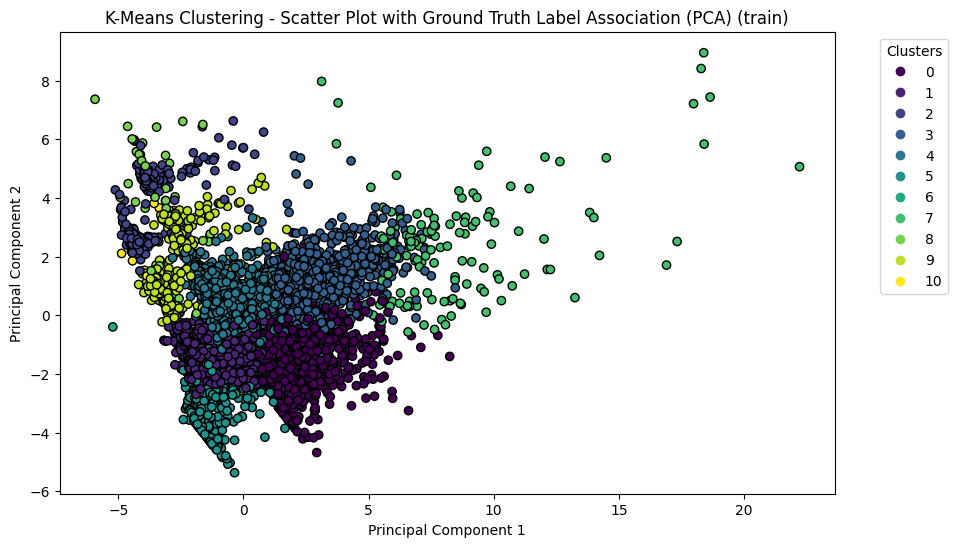

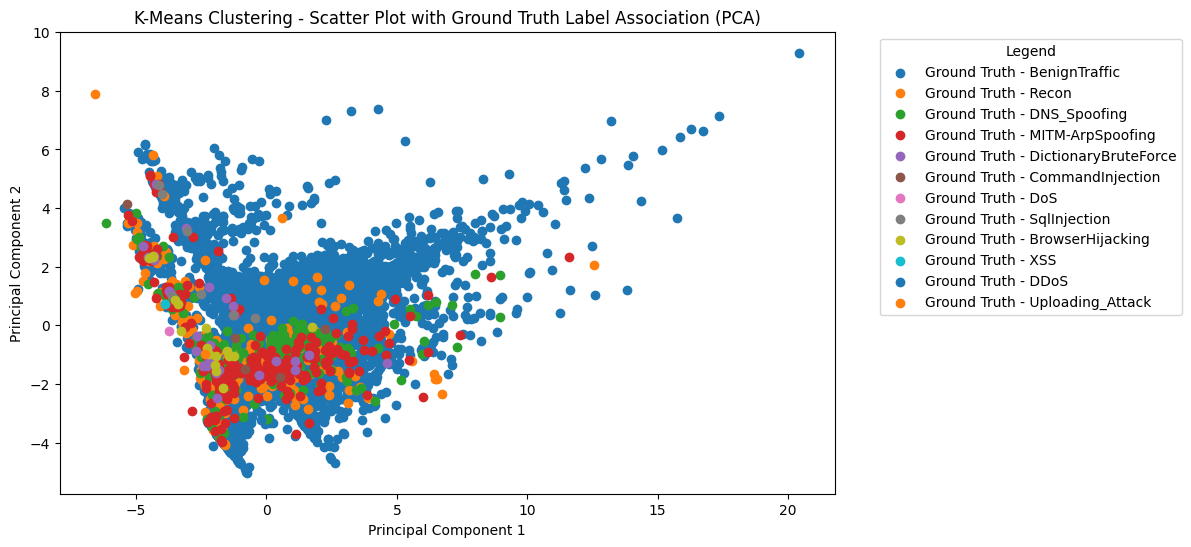

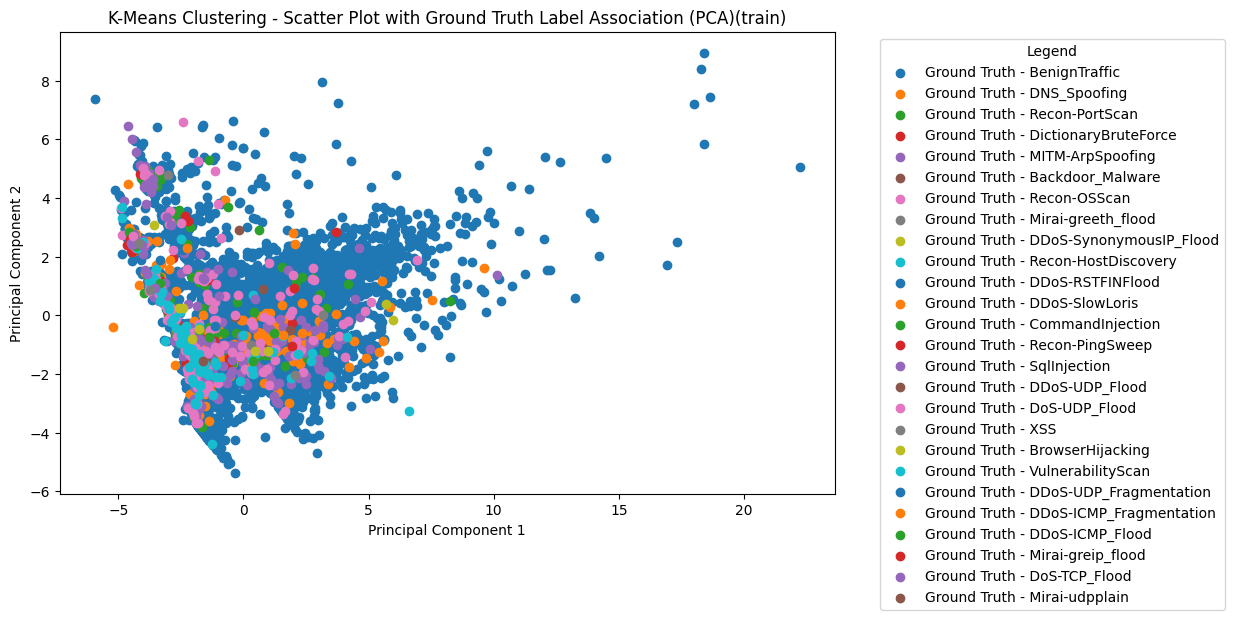

12
26
Cluster 0: Benign Ratio = 0.9405487804878049
Cluster 1: Benign Ratio = 0.718859649122807
Cluster 2: Benign Ratio = 0.0
Cluster 3: Benign Ratio = 1.0
Cluster 4: Benign Ratio = 0.9927536231884058
Cluster 5: Benign Ratio = 1.0
Cluster 6: Benign Ratio = 0.9751243781094527
Cluster 7: Benign Ratio = 0.8360655737704918
Cluster 8: Benign Ratio = 1.0
Cluster 9: Benign Ratio = 0.8993103448275862
Cluster 10: Benign Ratio = 0.9796747967479674
Threshold: 0.01, False Positive Rate (FPR): 0.12659828579457635
Clusters Labeled as Benign: [0, 1, 3, 4, 5, 6, 7, 8, 9, 10]
Number of Clusters Labeled as Benign: 10
False Positive Indices: [1, 5, 6, 9, 11, 16, 24, 27, 31, 54, 55, 62, 77, 78, 80, 88, 89, 105, 112, 125, 143, 157, 160, 166, 173, 222, 229, 252, 259, 270, 273, 305, 310, 319, 320, 323, 325, 327, 339, 352, 357, 373, 381, 393, 402, 406, 418, 437, 438, 439, 454, 459, 473, 487, 489, 493, 494, 502, 505, 510, 533, 541, 551, 552, 556, 557, 573, 576, 586, 597, 607, 609, 625, 641, 650, 665, 687, 690, 

C:\Users\JUI BANGALI\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Threshold: 0.1, False Positive Rate (FPR): 0.12659828579457635
Clusters Labeled as Benign: [0, 1, 3, 4, 5, 6, 7, 8, 9, 10]
Number of Clusters Labeled as Benign: 10
False Positive Indices: [1, 5, 6, 9, 11, 16, 24, 27, 31, 54, 55, 62, 77, 78, 80, 88, 89, 105, 112, 125, 143, 157, 160, 166, 173, 222, 229, 252, 259, 270, 273, 305, 310, 319, 320, 323, 325, 327, 339, 352, 357, 373, 381, 393, 402, 406, 418, 437, 438, 439, 454, 459, 473, 487, 489, 493, 494, 502, 505, 510, 533, 541, 551, 552, 556, 557, 573, 576, 586, 597, 607, 609, 625, 641, 650, 665, 687, 690, 693, 696, 705, 723, 724, 737, 738, 752, 760, 767, 776, 778, 781, 797, 801, 809, 815, 821, 823, 835, 841, 844, 850, 851, 855, 875, 882, 889, 919, 920, 935, 943, 944, 952, 967, 973, 983, 1007, 1032, 1037, 1038, 1040, 1043, 1047, 1048, 1050, 1054, 1069, 1070, 1074, 1078, 1081, 1103, 1112, 1113, 1128, 1129, 1136, 1148, 1149, 1151, 1158, 1164, 1182, 1184, 1186, 1202, 1206, 1210, 1222, 1225, 1229, 1235, 1238, 1242, 1245, 1250, 1254, 1258, 1267,

In [22]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.metrics import silhouette_score, davies_bouldin_score, confusion_matrix
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
#from gap_statistic import OptimalK

def scenario2():
    X = X_test
    y_true = y_test['label']
    
    # Standardize the data
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    X_scaled_train = scaler.fit_transform(X_train)
    
    # Apply PCA for dimensionality reduction to 2 components
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X_scaled)
    X_pca_train = pca.fit_transform(X_scaled_train)
    
    # Apply k-means clustering on the reduced dataset
    
    # MAIN CHANGE!!
    number_of_clusters = 11
    kmeans = KMeans(n_clusters=number_of_clusters, random_state=42)
    predicted_labels_train_data = kmeans.fit(X_scaled_train)
    predicted_labels_train = kmeans.predict(X_scaled_train)
    predicted_labels = kmeans.predict(X_scaled)

    #inertia
    inertia_model1 = kmeans.inertia_
    print("Inertia (Model 1):", inertia_model1)

    #silheoutte
    silhouette_score_model1 = silhouette_score(X, y_true)
    print("Silhouette Score (Model 1):", silhouette_score_model1)
    
    # Calculate Calinski-Harabasz Index
    calinski_harabasz_model1 = calinski_harabasz_score(X, y_true)
    print("Calinski-Harabasz Index (Model 1):", calinski_harabasz_model1)
    
    # Calculate Davies-Bouldin Index
    davies_bouldin_model1 = davies_bouldin_score(X, y_true)
    print("Davies-Bouldin Index (Model 1):", davies_bouldin_model1)
    
    # Convert predicted labels to strings for consistent comparison
    predicted_labels_matrix = predicted_labels.astype(str).tolist()
    
    # Calculate confusion matrix
    conf_matrix = confusion_matrix(y_true, predicted_labels_matrix)
    
    # Create a DataFrame to store the association between clusters and ground truth labels
    cluster_label_association = pd.DataFrame({'Cluster': predicted_labels, 'Ground Truth Label': y_true})
    cluster_label_association_train = pd.DataFrame({'Cluster': predicted_labels_train, 'Ground Truth Label': y})
    
    # Plot the association using a scatter plot
    plt.figure(figsize=(10, 6))
    
    # Plot data points without label names
    scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=predicted_labels, cmap='viridis', marker='o', edgecolors='k', label='Clustered Data')
    
    # Create a legend with cluster numbers
    legend_labels = list(range(number_of_clusters))
    plt.legend(handles=scatter.legend_elements()[0], labels=legend_labels, title='Clusters', bbox_to_anchor=(1.05, 1), loc='upper left')
    
    plt.title('K-Means Clustering - Scatter Plot with Ground Truth Label Association (PCA)')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    
    plt.show()
    
    # Plot the association using a scatter plot
    plt.figure(figsize=(10, 6))
    
    # Plot data points without label names
    scatter = plt.scatter(X_pca_train[:, 0], X_pca_train[:, 1], c=predicted_labels_train, cmap='viridis', marker='o', edgecolors='k', label='Clustered Data')
    
    # Create a legend with cluster numbers
    legend_labels = list(range(number_of_clusters))
    plt.legend(handles=scatter.legend_elements()[0], labels=legend_labels, title='Clusters', bbox_to_anchor=(1.05, 1), loc='upper left')
    
    plt.title('K-Means Clustering - Scatter Plot with Ground Truth Label Association (PCA) (train)')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    
    plt.show()
    
    # Plot the association using a scatter plot
    plt.figure(figsize=(10, 6))
    
    # Iterate over unique ground truth labels
    for label in y_true.unique():
        indices = cluster_label_association[cluster_label_association['Ground Truth Label'] == label].index
        plt.scatter(X_pca[indices, 0], X_pca[indices, 1], label=f'Ground Truth - {label}')
    
    # Add legend
    plt.legend(title='Legend', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.title('K-Means Clustering - Scatter Plot with Ground Truth Label Association (PCA)')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    
    plt.show()
    
    # Plot the association using a scatter plot
    plt.figure(figsize=(10, 6))
    
    # Iterate over unique ground truth labels
    for label in y_train.unique():
        indices = cluster_label_association_train[cluster_label_association_train['Ground Truth Label'] == label].index
        plt.scatter(X_pca_train[indices, 0], X_pca_train[indices, 1], label=f'Ground Truth - {label}')
    
    # Add legend
    plt.legend(title='Legend', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.title('K-Means Clustering - Scatter Plot with Ground Truth Label Association (PCA)(train)')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    
    plt.show()

    print(y_true.unique().size)
    print(y_train.unique().size)

    # Fit K-Means model to the training data
    kmeans = KMeans(n_clusters=number_of_clusters, random_state=42)
    train_predicted_labels = kmeans.fit_predict(X_train)

    scaled_test_data = scaler.transform(test_data)

    # Predict the clusters for the test data
    cluster_labels_test = kmeans.predict(test_data)
    
    # Calculate the percentage of benign traffic in each cluster for the training set
    cluster_benign_ratio_train = {}

    benign_class_label = 'BenignTraffic'

    for cluster_label in range(number_of_clusters): 
        cluster_mask = (train_predicted_labels == cluster_label)
        
        # Calculate the denominator
        denominator = np.sum(cluster_mask)
        
        # Check if the denominator is greater than zero before performing the division
        if denominator > 0:
            cluster_benign_ratio_train[cluster_label] = np.sum(y_train[cluster_mask] == benign_class_label) / denominator
        else:
            cluster_benign_ratio_train[cluster_label] = 0  # or any other value you consider appropriate
    for cluster_label, benign_ratio in cluster_benign_ratio_train.items():
        print(f"Cluster {cluster_label}: Benign Ratio = {benign_ratio}")

    test_data_indices = range(len(y_true))
    # adjust this threshold based on the criteria
    benign_thresholds = [0.01, 0.1, 0.25, 0.5, 0.75, 0.95, 0.99]
    fpr_values = {}
    for threshold in benign_thresholds:
        clusters_labeled_as_benign = [cluster_label for cluster_label, ratio in cluster_benign_ratio_train.items() if ratio > threshold]

        false_positive_indices = [idx for idx in test_data_indices if cluster_labels_test[idx] in clusters_labeled_as_benign and y_true[idx] != benign_class_label]

        fpr = len(false_positive_indices) / len(test_data_indices)
        print(f"Threshold: {threshold}, False Positive Rate (FPR): {fpr}")
        print("Clusters Labeled as Benign:", clusters_labeled_as_benign)
        num_clusters_labeled_as_benign = len(clusters_labeled_as_benign)
        print("Number of Clusters Labeled as Benign:", num_clusters_labeled_as_benign)
        print("False Positive Indices:", false_positive_indices)
        print("\n")

        # Add FPR value to the dictionary
        fpr_values[threshold] = fpr
    
    # Create a DataFrame
    fpr_df1 = pd.DataFrame({
        'Threshold': list(fpr_values.keys()),
        'FPR': list(fpr_values.values())
    })

    
    return fpr_df1,conf_matrix, inertia_model1, silhouette_score_model1, calinski_harabasz_model1, davies_bouldin_model1, cluster_label_association, cluster_label_association_train 

fpr_df1,c,i,s,ch,d,cluster_label_association, cluster_label_association_train = scenario2()

# FIND FP BY CONSIDERING BENIGN AS POSITIVE LABEL

In [23]:
cluster_label_association

,Cluster,Ground Truth Label
0,4,BenignTraffic
1,1,Recon
2,0,BenignTraffic
3,1,BenignTraffic
4,1,BenignTraffic
...,...,...
7112,9,BenignTraffic
7113,4,BenignTraffic
7114,5,BenignTraffic
7115,1,BenignTraffic


In [24]:
cluster_label_association_train

,Cluster,Ground Truth Label
0,3,BenignTraffic
1,4,BenignTraffic
2,4,BenignTraffic
3,3,BenignTraffic
4,0,BenignTraffic
...,...,...
5985,0,BenignTraffic
5986,9,Recon-OSScan
5987,2,BenignTraffic
5988,4,BenignTraffic


In [25]:
cluster_gtl_counts = cluster_label_association.groupby('Cluster')['Ground Truth Label'].value_counts().unstack(fill_value=0)

In [26]:
cluster_gtl_counts_train = cluster_label_association_train.groupby('Cluster')['Ground Truth Label'].value_counts().unstack(fill_value=0)

In [27]:
print(cluster_gtl_counts)
print(cluster_gtl_counts_train)

Ground Truth Label  BenignTraffic  BrowserHijacking  CommandInjection  DDoS  \
Cluster                                                                       
0                             907                 1                 1     0   
1                            1191                 9                 3     1   
2                             385                 3                 1     0   
3                            1205                 0                 0     0   
4                            1413                 0                 0     0   
5                             478                 0                 0     0   
6                               0                 0                 0     0   
7                             146                 0                 0     0   
8                              58                 0                 0     0   
9                             431                 4                 1     0   
10                              2                 0 

In [28]:
def main_table():
    cluster_b_ratio = (cluster_gtl_counts['BenignTraffic'] / cluster_gtl_counts.sum(axis=1)).fillna(0)
    print("Testing - ", cluster_b_ratio)
    cluster_b_ratio_train = (cluster_gtl_counts_train['BenignTraffic'] / cluster_gtl_counts_train.sum(axis=1)).fillna(0)
    print("Training - ", cluster_b_ratio_train)
    return cluster_b_ratio

c = main_table()

Testing -  Cluster
0     0.824545
1     0.753321
2     0.800416
3     0.990954
4     0.991579
5     0.900188
6     0.000000
7     0.924051
8     0.920635
9     0.782214
10    0.222222
dtype: float64
Training -  Cluster
0     0.821346
1     0.752696
2     0.749409
3     0.975610
4     0.964564
5     0.904968
6     0.000000
7     0.948529
8     0.775510
9     0.696842
10    0.625000
dtype: float64
